Ising Metropolis Module Playground

In [2]:
import ising_metropolis as im 
import matplotlib.pyplot as plt

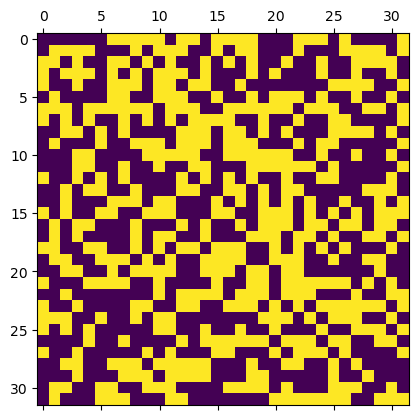

In [5]:
random_grid = im.create_random_grid(grid_shape=(32,32))
plt.matshow(random_grid);